## Cho dữ liệu titanic3.csv chứa thông tin về các hành khách trên con tàu Titanic 

## Một trong những thông tin quan trọng để dự đoán một hành khách còn sống hay đã chết là 'age', 'fare'. 
## Kiểm tra xem dữ liệu trên 2 cột này có null hay không, nếu có hãy xóa bỏ các dòng null. Phân tích thông tin sơ bộ về dữ liệu trên hai thuộc tính này. 

## Trực quan hóa dữ liệu. 
## Để việc dự đoán tốt hơn cần phải kiểm tra và chuẩn hóa dữ liệu. Hãy chọn một phương pháp để chuẩn hóa dữ liệu dựa trên thông tin nêu trên.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

In [12]:
titanic = pd.read_csv('data4/Ex3_Titanic/titanic3.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [70]:
titanic[['age', 'fare']].isnull().sum()

age     263
fare      1
dtype: int64

In [72]:
titanic_raw = titanic[['age','fare','survived']]
titanic_raw = titanic_raw.dropna()

titanic_raw

,age,fare,survived
0,29.0000,211.3375,1
1,0.9167,151.5500,1
2,2.0000,151.5500,0
3,30.0000,151.5500,0
4,25.0000,151.5500,0
...,...,...,...
1301,45.5000,7.2250,0
1304,14.5000,14.4542,0
1306,26.5000,7.2250,0
1307,27.0000,7.2250,0


--------------------------------- age ---------------------------------

age skewness = 0.406423225805499
age kurtosis = 0.14844600384037854



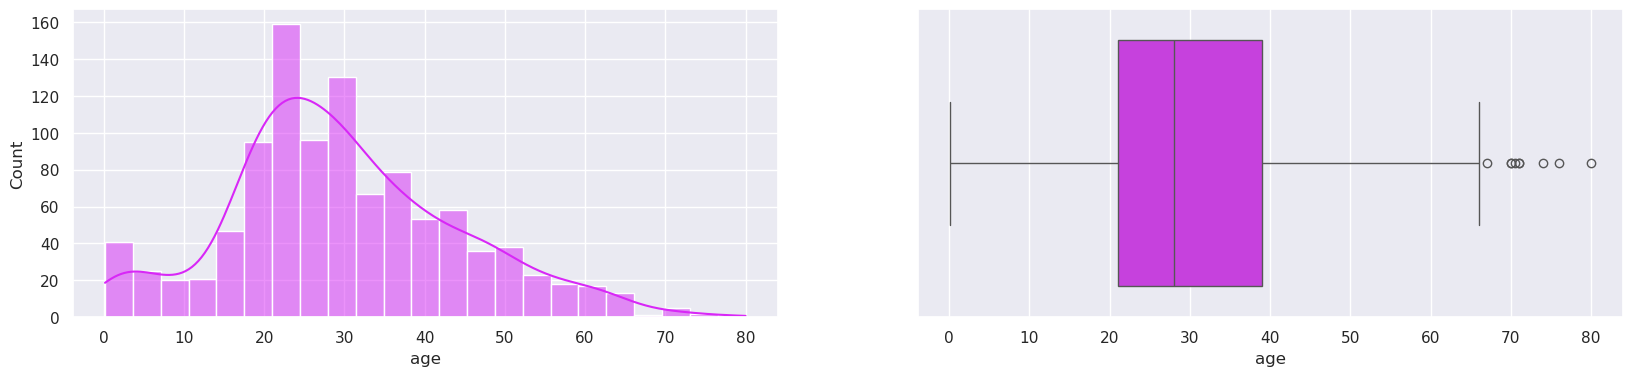


--------------------------------- fare ---------------------------------

fare skewness = 4.1097910806060725
fare kurtosis = 23.537684706841425



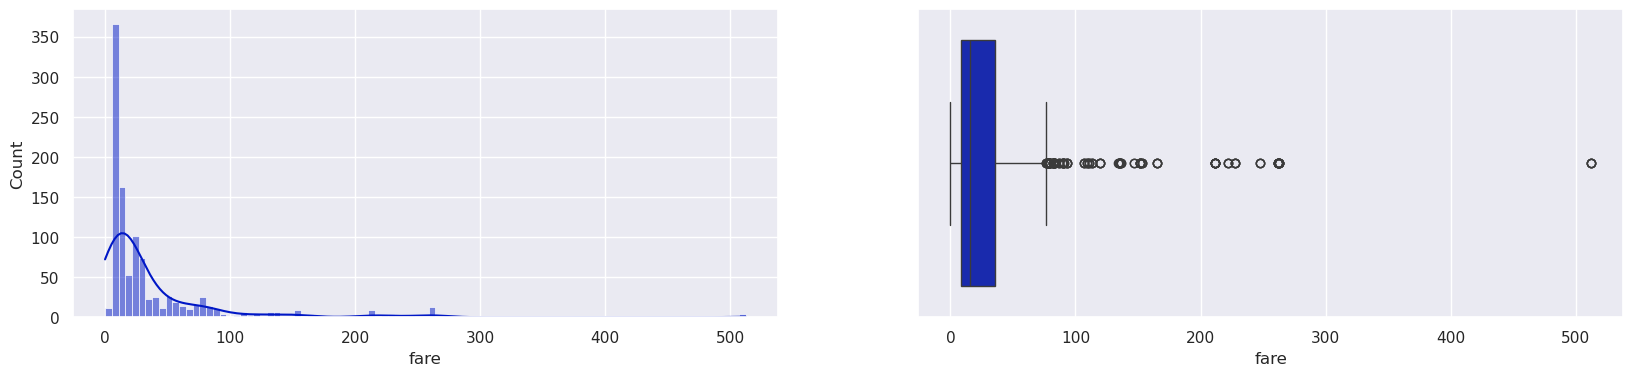

In [24]:
import random

for col in ['age', 'fare']:
    print(f'--------------------------------- {col} ---------------------------------')
    print(f'\n{col} skewness = {stats.skew(titanic_raw[col])}')
    print(f'{col} kurtosis = {stats.kurtosis(titanic_raw[col])}\n')

    hex_code = "#{:06x}".format(random.randint(0,0xFFFFFF))

    sbn.set_theme(style='darkgrid')
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sbn.histplot(titanic_raw[col], color=hex_code, kde=True)
    
    plt.subplot(1,2,2)
    sbn.boxplot(titanic_raw[col], color=hex_code, orient='h')
    plt.show()
    print()

## "age" and "fare" have a lot of outliers => Eliminate outliers => apply MinMaxScaler

In [34]:
#Remove outliers
lst_index_to_drop = []
for col in ['age', 'fare']:
    q1 = np.quantile(titanic_raw[col], 0.25)
    q3 = np.quantile(titanic_raw[col], 0.75)
    iqr = stats.iqr(titanic_raw[col])
    condition = (titanic_raw[col] < (q1 - iqr*1.5)) | (titanic_raw[col] > (q3 + iqr*1.5))
    lst_index_to_drop += titanic_raw.loc[condition, col].index.to_list()

lst_index_to_drop = list(set(lst_index_to_drop))

titanic_raw_no_out = titanic_raw.drop(lst_index_to_drop, axis=0).reset_index(drop=True)
titanic_raw_no_out

,age,fare,survived
0,48.0,26.5500,1
1,39.0,0.0000,0
2,53.0,51.4792,1
3,24.0,69.3000,1
4,32.0,76.2917,1
...,...,...,...
902,45.5,7.2250,0
903,14.5,14.4542,0
904,26.5,7.2250,0
905,27.0,7.2250,0


In [52]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

titanic_scaled = minmax.fit_transform(titanic_raw_no_out[['age','fare']])
titanic_scaled = pd.DataFrame(titanic_scaled, columns = ['age','fare'])
titanic_scaled['survived'] = titanic_raw_no_out['survived']

titanic_scaled

,age,fare,survived
0,0.726582,0.348006,1
1,0.589873,0.000000,0
2,0.802532,0.674768,1
3,0.362025,0.908356,1
4,0.483544,1.000000,1
...,...,...,...
902,0.688607,0.094702,0
903,0.217721,0.189460,0
904,0.400000,0.094702,0
905,0.407595,0.094702,0


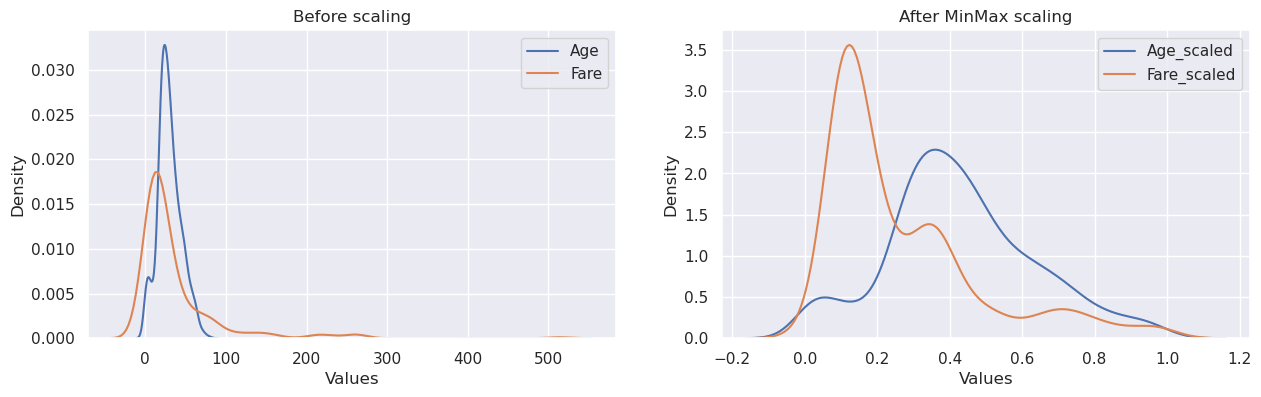

In [54]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sbn.set_theme(style='darkgrid')
sbn.kdeplot(titanic_raw['age'], label='Age')
sbn.kdeplot(titanic_raw['fare'], label='Fare')
plt.xlabel('Values')
plt.title('Before scaling')
plt.legend()

plt.subplot(1,2,2)
sbn.set_theme(style='darkgrid')
sbn.kdeplot(titanic_scaled['age'], label='Age_scaled')
sbn.kdeplot(titanic_scaled['fare'], label='Fare_scaled')
plt.xlabel('Values')
plt.title('After MinMax scaling')
plt.legend()

plt.show()

## Train raw data titanic_raw with Logistic Regression model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
log_titanic_raw = LogisticRegression()
log_titanic_raw.fit(X=titanic_raw[['age','fare']], y=titanic_raw['survived'])

predict_raw = log_titanic_raw.predict(titanic_raw[['age','fare']])

accuracy_raw = accuracy_score(y_true=titanic_raw['survived'], y_pred=predict_raw)

print('Accuracy of LogReg model trained with titanic_raw data:', accuracy_raw)

Accuracy of LogReg model trained with titanic_raw data: 0.6401913875598086


## Train scaled data titanic_scaled with Logistic Regression model

In [66]:
log_titanic_scaled = LogisticRegression()
log_titanic_scaled.fit(X=titanic_scaled[['age','fare']], y=titanic_scaled['survived'])

predict_scaled = log_titanic_scaled.predict(titanic_scaled[['age','fare']])

accuracy_scaled = accuracy_score(y_true=titanic_scaled['survived'], y_pred=predict_scaled)

print('Accuracy of LogReg model trained with titanic_scaled data:', accuracy_scaled)

Accuracy of LogReg model trained with titanic_scaled data: 0.6504961411245865


## There is a slight improvement after using MinMaxScaler